# **Introduction**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

*Acknowledgements*


This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/****).

**Inspiration**


* What can we learn about different hosts and areas?

* What can we learn from predictions? (ex: locations, prices, reviews, etc)

* Which hosts are the busiest and why?

* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [78]:
import geopandas as gpd            # Python Geospatial Data Library
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# Load Data

In [32]:
#importing necessery libraries for future analysis of the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [33]:
airbnb = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [34]:
#checking type of every column in the dataset
print(airbnb.dtypes)
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


48895

In [35]:
print('\nUnique values :  \n',airbnb.nunique())


Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# Data Wrangling 

In [36]:
airbnb.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [37]:
total = airbnb.isnull().sum().sort_values(ascending=False)
percent = ((airbnb.isnull().sum())*100)/48895
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total    Percent
reviews_per_month               10052  20.558339
last_review                     10052  20.558339
host_name                          21   0.042949
name                               16   0.032723
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

In [38]:
total = airbnb.isnull().sum().sort_values(ascending=False)
percent = ((airbnb.isnull().sum())*100)/airbnb.isnull().count().sort_values(ascending=False)
percent = round(percent, 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total  Percent
reviews_per_month               10052    20.56
last_review                     10052    20.56
host_name                          21     0.04
name                               16     0.03
availability_365                    0     0.00
calculated_host_listings_count      0     0.00
number_of_reviews                   0     0.00
minimum_nights                      0     0.00
price                               0     0.00
room_type                           0     0.00
longitude                           0     0.00
latitude                            0     0.00
neighbourhood                       0     0.00
neighbourhood_group                 0     0.00
host_id                             0     0.00
id                                  0     0.00

In [39]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)


In [40]:
airbnb.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [41]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#airbnb['reviews_per_month'] = airbnb['reviews_per_month'].replace(np.nan, 0)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [42]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [43]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [44]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Data Exploration and Visualization

In [45]:
airbnb.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

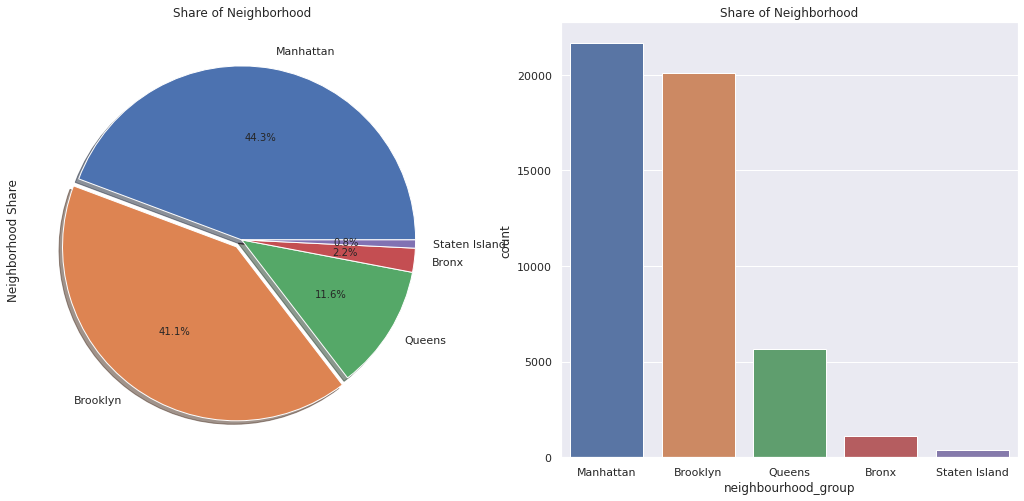

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
airbnb['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot(x = 'neighbourhood_group',data = airbnb, ax=ax[1],order=airbnb['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

Manhatten and Brooklyn have the highest share of hotels.

In [47]:
#what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [48]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

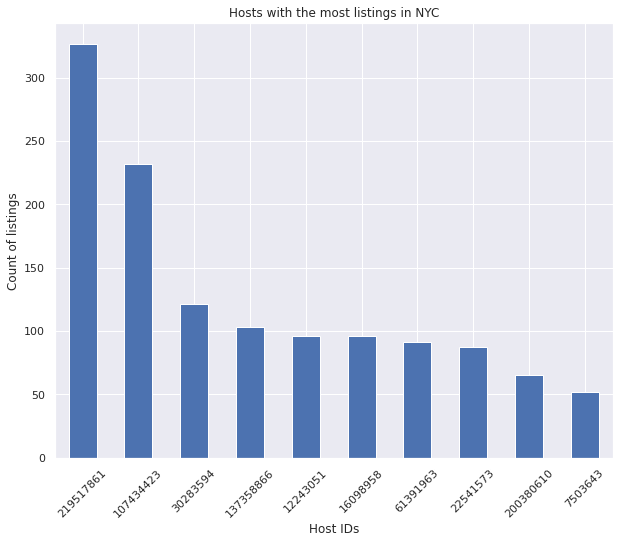

In [49]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
viz1 = top_host.plot(kind = 'bar')
viz1.set_title('Hosts with the most listings in NYC')
viz1.set_xlabel('Host IDs')
viz1.set_ylabel('Count of listings')
viz1.set_xticklabels(viz1.get_xticklabels(), rotation = 45)

In [50]:
#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [51]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
price_list_by_n_2 = []
#creating list with known values in neighbourhood_group column
column_names = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    #i= i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_list_by_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
price_list_by_n_2[0].rename(columns={'price':column_names[0]}, inplace=True)
price_list_by_n_2[1].rename(columns={'price':column_names[1]}, inplace=True)
price_list_by_n_2[2].rename(columns={'price':column_names[2]}, inplace=True)
price_list_by_n_2[3].rename(columns={'price':column_names[3]}, inplace=True)
price_list_by_n_2[4].rename(columns={'price':column_names[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df = price_list_by_n_2
stat_df = [element.set_index('Stats') for element in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

Brooklyn     Manhattan        Queens  Staten Island        Bronx
Stats                                                                      
count  20104.000000  21661.000000   5666.000000     373.000000  1091.000000
mean     124.383207    196.875814     99.517649     114.812332    87.496792
std      186.873538    291.383183    167.102155     277.620403   106.709349
min        0.000000      0.000000     10.000000      13.000000     0.000000
25%       60.000000     95.000000     50.000000      50.000000    45.000000
50%       90.000000    150.000000     75.000000      75.000000    65.000000
75%      150.000000    220.000000    110.000000     110.000000    99.000000
max    10000.000000  10000.000000  10000.000000    5000.000000  2500.000000

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

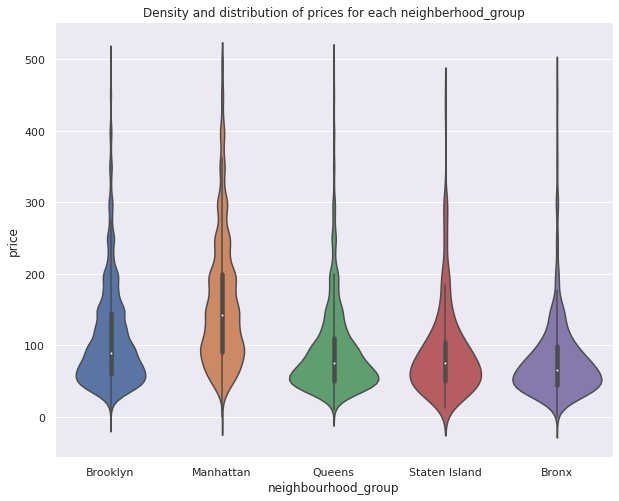

In [52]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them 
#for the sake of a better visualization
sub_dataframe = airbnb[airbnb.price < 500]

viz2=sns.violinplot(data=sub_dataframe, x='neighbourhood_group', y='price')
viz2.set_title('Density and distribution of prices for each neighberhood_group')

First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [53]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

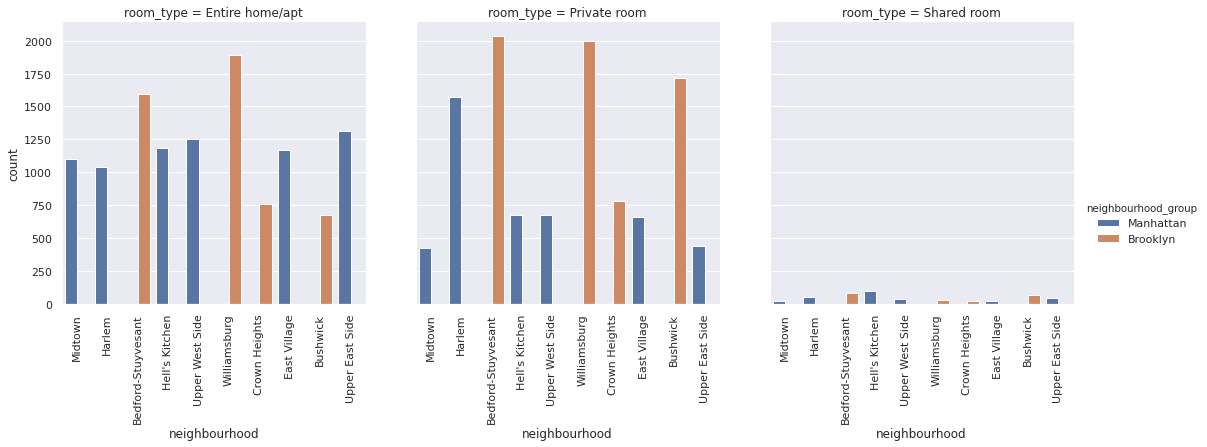

In [54]:
#grabbing top 10 neighbourhoods for sub-dataframe
top_nei = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

top_nei_plot = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_nei, kind='count')
top_nei_plot.set_xticklabels(rotation=90)

'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

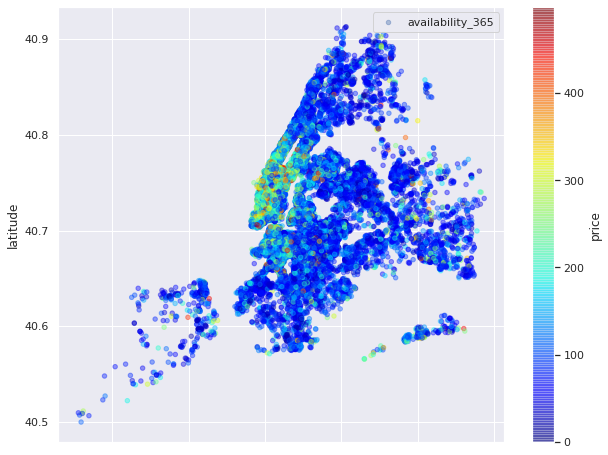

In [55]:
scatterplot = sub_dataframe.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
scatterplot.legend()

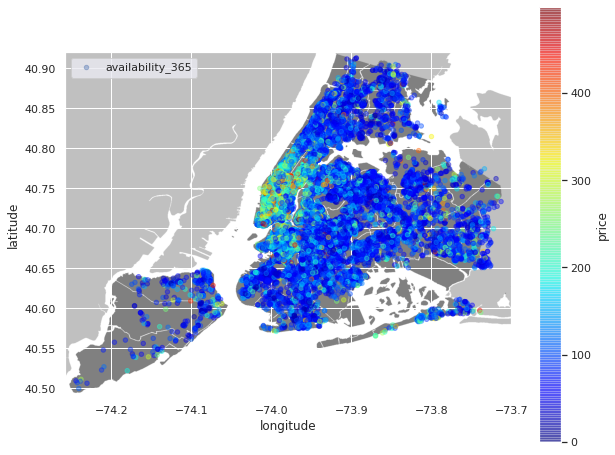

In [56]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_dataframe.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

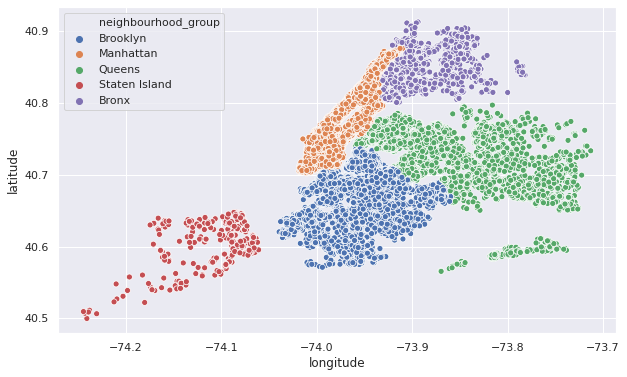

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.show()

In [58]:
import folium
from folium.plugins import HeatMap
m = folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

The highest Density areas are marked in red and lowest density areas are marked in blue color.

In [59]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [61]:
from collections import Counter
#let's see top 25 used words by host to name their listing
top_25_w=Counter(_names_for_count_).most_common()
top_25_w=top_25_w[0:25]

In [62]:
#now let's put our findings in dataframe for further visualizations
top_25_w_df = pd.DataFrame(top_25_w)
top_25_w_df.head()

0      1
0         in  16733
1       room   9389
2    bedroom   7231
3    private   6985
4  apartment   6113

In [63]:
top_25_w_df.rename(columns={0:'Words', 1:'Count'}, inplace=True)
top_25_w_df.head()

Words  Count
0         in  16733
1       room   9389
2    bedroom   7231
3    private   6985
4  apartment   6113

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

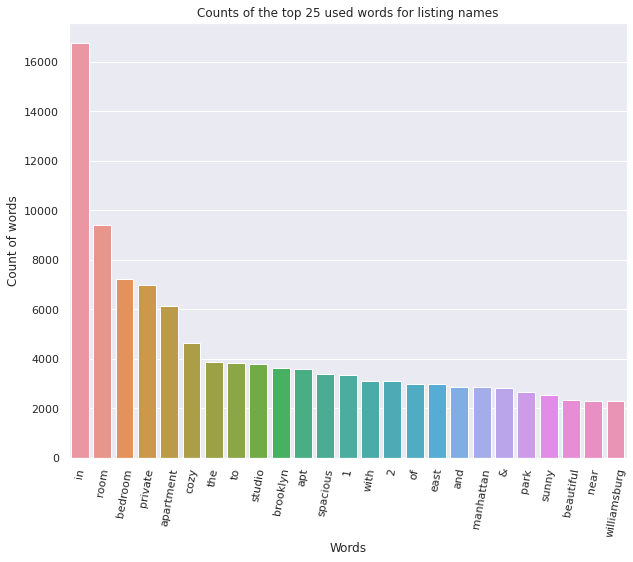

In [64]:
#we are going to use barplot for this visualization
top_25_w_barplot = sns.barplot(x='Words', y='Count', data= top_25_w_df)
top_25_w_barplot.set_title('Counts of the top 25 used words for listing names')
top_25_w_barplot.set_ylabel('Count of words')
top_25_w_barplot.set_xlabel('Words')
top_25_w_barplot.set_xticklabels(top_25_w_barplot.get_xticklabels(), rotation=80)

It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such wors are 'room', 'bedroom', 'private', 'apartment', 'studio'. 

This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible.

In [65]:
top_reviewed_listings = airbnb.sort_values(by = ['number_of_reviews'], ascending = False)
top_reviewed_listings = top_reviewed_listings.head(10)
top_reviewed_listings

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [66]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [67]:
price_avg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avg))

Average price per night: 65.4


From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of $65 with most of the listings under \$50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.

In [68]:
#Categorising based on Price
def rank_price(hotel_price):
    if hotel_price <= 75:
        return 'Low'
    elif hotel_price >75 and hotel_price <= 500:
        return 'Medium'
    else:
        return 'High'

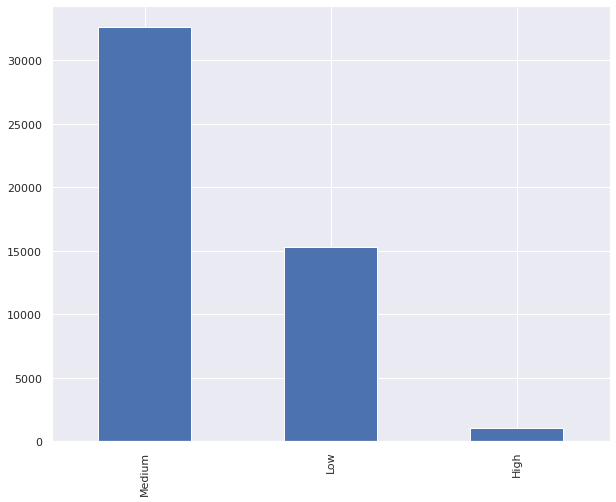

In [69]:
airbnb['price'].apply(rank_price).value_counts().plot(kind='bar');

So most of the rooms fall in the Medium (75-200 $) category

<Figure size 720x432 with 0 Axes>

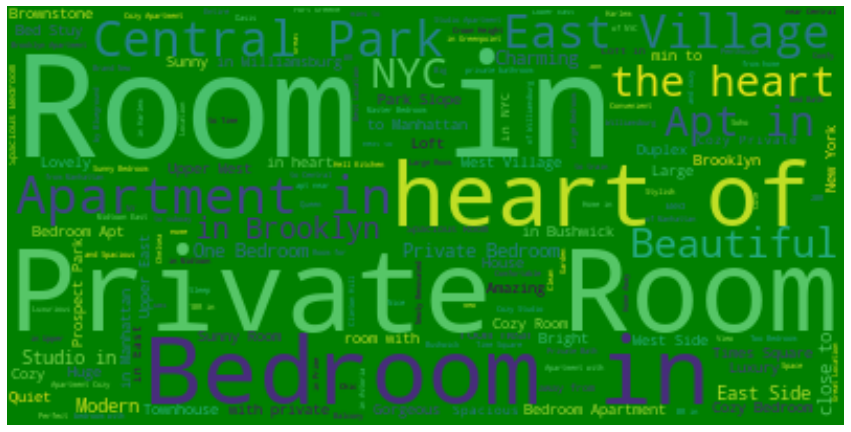

In [70]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in airbnb.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="green").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
#Displaying rooms with maximum Reviews
roomwmaxreview = airbnb.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
roomwmaxreview.head()

name   host_id neighbourhood_group  \
11759         Room near JFK Queen Bed  47621202              Queens   
2031       Great Bedroom in Manhattan   4734398           Manhattan   
2030   Beautiful Bedroom in Manhattan   4734398           Manhattan   
2015     Private Bedroom in Manhattan   4734398           Manhattan   
13495         Room Near JFK Twin Beds  47621202              Queens   

      neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
11759       Jamaica  40.66730  -73.76831  Private room     47               1   
2031         Harlem  40.82085  -73.94025  Private room     49               1   
2030         Harlem  40.82124  -73.93838  Private room     49               1   
2015         Harlem  40.82264  -73.94041  Private room     49               1   
13495       Jamaica  40.66939  -73.76975  Private room     47               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
11759                629              14.58                               2   
2031                 607               7.75                               3   
2030                 597               7.72                               3   
2015                 594               7.57                               3   
13495                576              13.40                               2   

       availability_365  
11759               333  
2031                293  
2030                342  
2015                339  
13495               173

In [73]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')

Long=-73.80
Lat=40.80
map_ = folium.Map([Lat,Long],zoom_start=10,)

map_rooms_map=plugins.MarkerCluster().add_to(map_)

for lat,lon,label in zip(roomwmaxreview.latitude,roomwmaxreview.longitude,roomwmaxreview.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(map_rooms_map)

map_.add_child(map_rooms_map)

map_

Rooms with the most number of reviews


# Conclusion

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.

1. We found that our top host has 327 listings. It seems like hosts have taken good advantage of the Airbnb platform and provide the most listings; 
2. We proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another;
3. We put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings;
4. We parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts;
5. We found the most reviewed listings and analyzed price attribute.

# Price prediction with Machine Learning


In [74]:
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [76]:
airbnb.drop(['name'], axis = 1, inplace = True)
airbnb.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [84]:
'''Encode labels with value between 0 and n_classes-1.'''
  
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()# Fit label encoder

airbnb['neighbourhood_group'] = le.fit_transform(airbnb['neighbourhood_group'])    
# Transform labels to normalized encoding.

le = LabelEncoder()

airbnb['neighbourhood'] = le.fit_transform(airbnb['neighbourhood'])

le = LabelEncoder()

airbnb['room_type'] = le.fit_transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [85]:
'''Train LRM'''
lm = LinearRegression()

X = airbnb.loc[:, airbnb.columns != 'price']
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357
        Mean Absolute Error: 72.86091366825617
     


In [87]:
error_airbnb = pd.DataFrame({
        'Actual Values': y_test,
        'Predicted Values': predicts}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
21279            400        135.112125
22168            140        210.599057
21628            195        176.222978
13573            120        100.439183
21959             88         88.545753

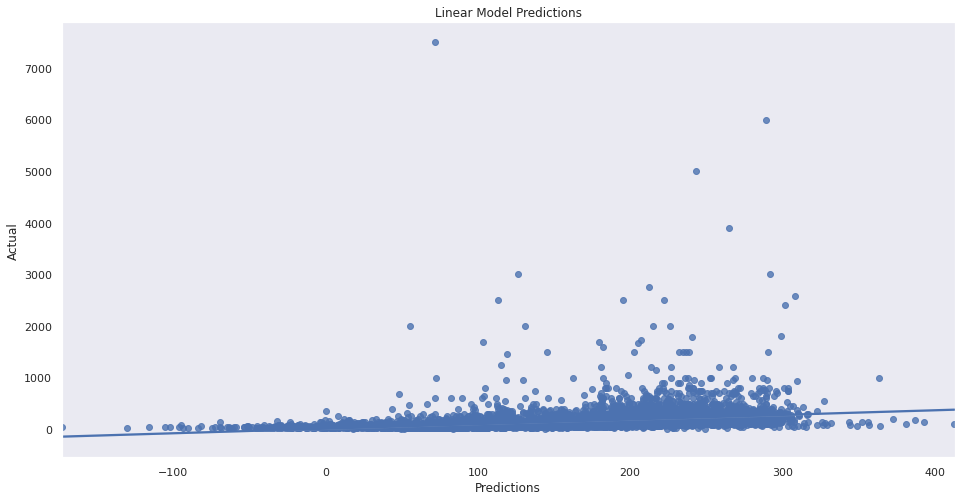

In [88]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()